![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Preprocessing](00_Intro_Preprocessing.ipynb)

# Rescaling, Standardizing and Normalizing Data

When our data comprises attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to have the same scale. 

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. 



Examples:
* linear and logistic regression
* nearest neighbors
* neural networks
* support vector machines with radial bias kernel functions
* principal components analysis
* linear discriminant analysis

The three terms are frequently used interchangeably, but their meanings differ.

* **Rescaling** means adding/subtracting a constant, then multiplying/dividing by another constant so the features can lie between given minimum and maximum values. For example, convert Celsius to Fahrenheit or [0, 1].

* **Standardizing**: subtract the mean and divide by the standard deviation, obtaining a "standard normal" distribution.

* **Normalizing**: dividing by a vector norm, so values are between [0, 1]. This process can be helpful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples

## Rescaling with with Scikit-Learn
We have different classes. The main ones are:

* **MinMaxScaler**: substracts the minimum value in the feature and divides it by the range (maximum - minimum). The result is a value in [0, 1]. Preserves the original form of the data and does not reduce the importance of outliners.
* **MaxAbsScaler**divides each feature by its maximum absolute value. The result is a value in [-1 1]. This method preserves the original form of the data and does not reduce the importance of outliners.

* **RobustScaler**: substracts the median and divides by the interquartile range (75% value - 25% value). It is used to reduce the effect of outliers. The result is not scaled in a predefined interval.
* **StandardScaler**: substracts the mean and divides by the standard deviation. The result is a standard distribution with a variance of 1 and a mean of 0.

In [15]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [16]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2,  0.,  0.],
                    [ 0.,  1., -1.]])

In [17]:
#scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.MaxAbsScaler()
#scaler = preprocessing.RobustScaler()
scaler = preprocessing.StandardScaler()

In [18]:
scaler

StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
X_train_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

We will compare these transformations.


In [21]:
# adapted from http://benalexkeen.com/feature-scaling-with-scikit-learn/
# Create several distributions
np.random.seed(1)
df1 = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(-5, 5, 10000)
})

In [22]:
df2 = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [23]:
# helper function
def draw_scaler(df, scaler, title):
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
    ax1.set_title('Before Scaling')
    sns.kdeplot(df['x1'], ax=ax1)
    sns.kdeplot(df['x2'], ax=ax1)
    ax2.set_title('After ' + title)
    sns.kdeplot(scaled_df['x1'], ax=ax2)
    sns.kdeplot(scaled_df['x2'], ax=ax2)
    plt.show()

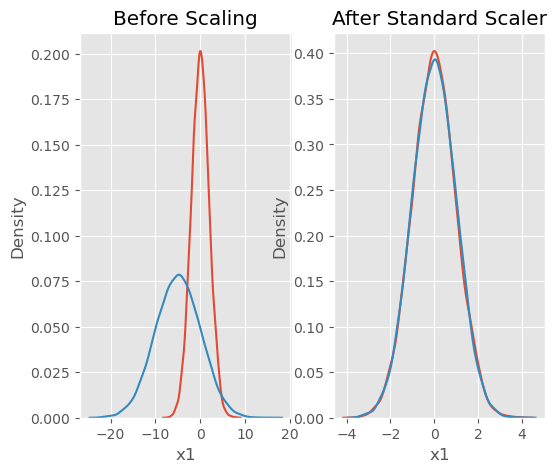

In [24]:
draw_scaler(df1, preprocessing.StandardScaler(), "Standard Scaler")

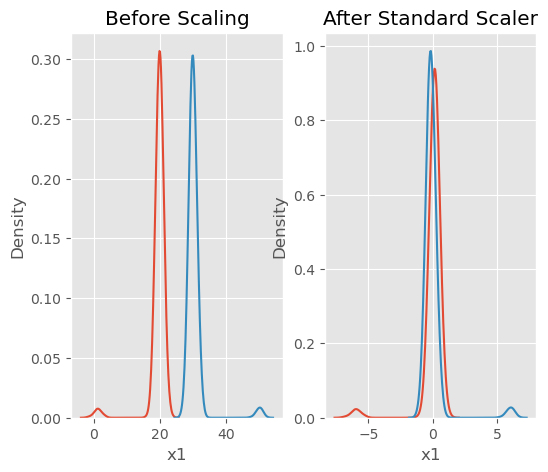

In [25]:
draw_scaler(df2, preprocessing.StandardScaler(), "Standard Scaler")

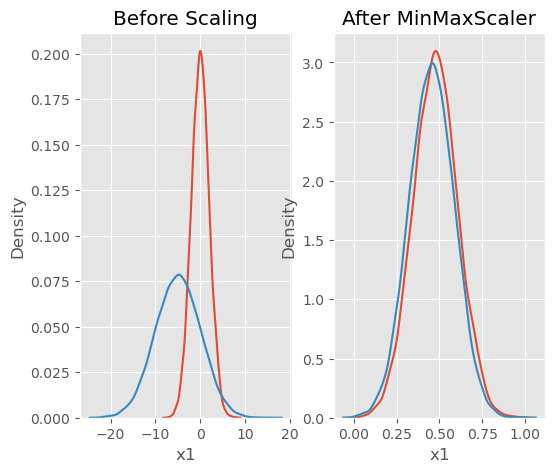

In [26]:
draw_scaler(df1, preprocessing.MinMaxScaler(), "MinMaxScaler")

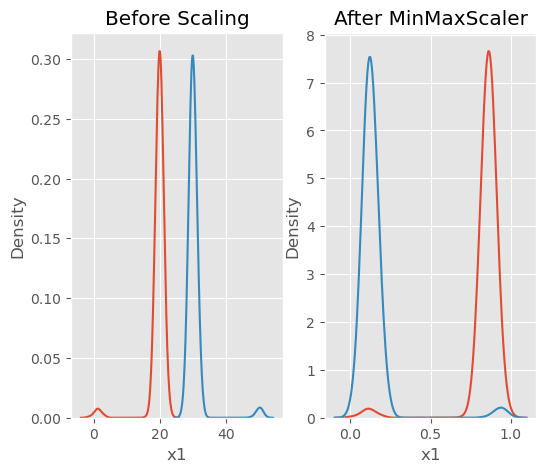

In [27]:
draw_scaler(df2, preprocessing.MinMaxScaler(), "MinMaxScaler")

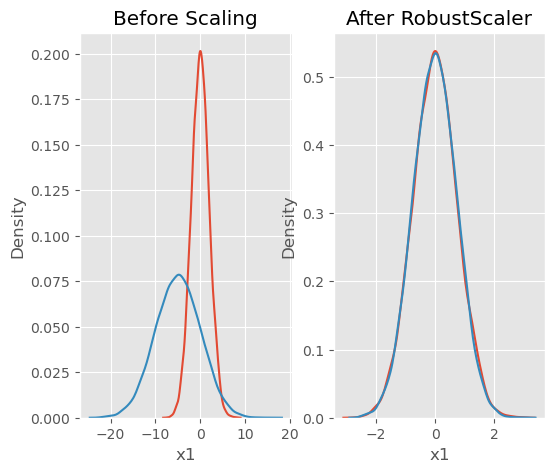

In [28]:
draw_scaler(df1, preprocessing.RobustScaler(), "RobustScaler")

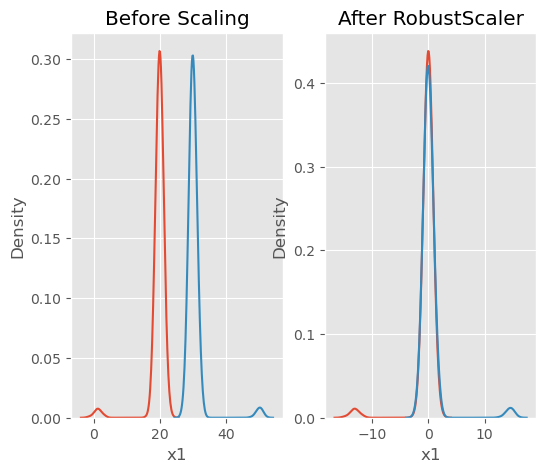

In [29]:
draw_scaler(df2, preprocessing.RobustScaler(), "RobustScaler")

# References
* [Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html) Scikit-Learn
* [Cleaning and Prepping Data with Python for Data Science — Best Practices and Helpful Packages](https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3), DeFilippi, 2019, 
* [Data Preprocessing for Machine learning in Python, GeeksForGeeks](https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/)
* [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02), J. Hales.
* [Scale, Standardize, and Normalize Data
](http://blog.pengyifan.com/scale-standardize-and-normalize-data/), Y. Peng, 2013.
* [Feature Scaling with scikit-learn](http://benalexkeen.com/feature-scaling-with-scikit-learn/), A. Keen, 2017

## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.